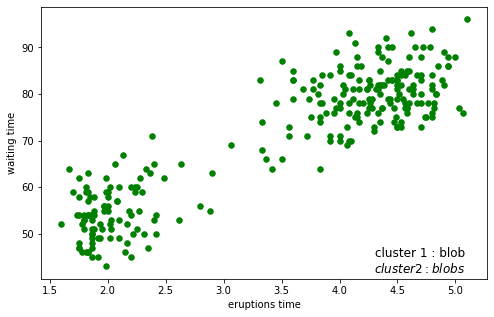

In [1]:
# DATA MINING - HOMEWORK 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 8,5


df= pd.read_csv("faithful.csv")


# Problem 1.a and 1.b

df.plot.scatter(x = 'eruptions', y = 'waiting', s = 30, c='green')
plt.xlabel('eruptions time')
plt.ylabel('waiting time')
ax=plt.gca()
ax.text(0.95, 0.01,'cluster 1 : blob\n' +\
    '$cluster 2 : blobs $' ,verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes,color='black',
        fontsize=12)


plt.show()


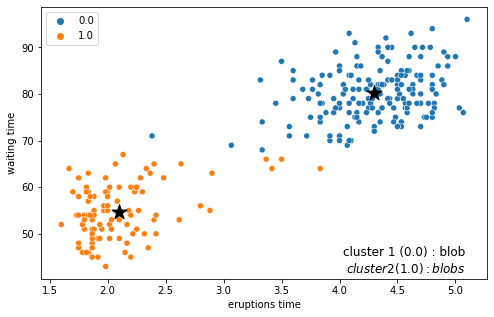

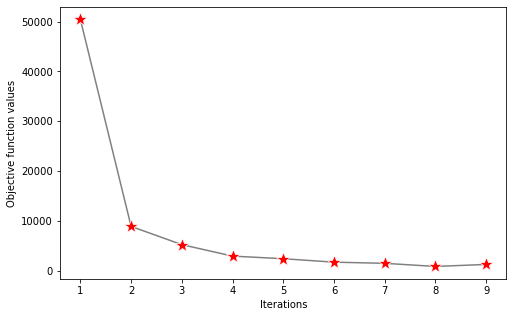

In [2]:

# Problem 2 

df = df.iloc[:,0:2]
x= df.values
k = 2 # No of clusters


# question 2.a)

def k_means_clustering(x, k):
    a = 1
    parts = np.zeros(x.shape[0]) #define an array to store cluster values
    centers = df.sample(n=k).values #to get centroids
    
    while a:
        for i, row in enumerate(x):# iterate over each row
            min_d = float('inf')
            for ids, center in enumerate(centers):        
                d = ((center[0]-row[0])**2 + (center[1]-row[1])**2)**.5 # dist from the point to the centroids
                if min_d > d:    # find closest centroid
                    min_d = d
                    parts[i] = ids
         
        groupby_df= pd.DataFrame(x).groupby(by=parts)
        new_center=groupby_df.mean().values
        
        if np.count_nonzero(centers-new_center) == 0:a = 0
        else:centers = new_center     # if the new centroid !=old ,then update centriods

    return centers, parts 


centers, parts = k_means_clustering(x, k)


# question 2.b) - Plot

rcParams['figure.figsize'] = 8,5

sns.scatterplot(x[:,0], x[:, 1], hue=parts)

plt.scatter(centers[:,0], centers[:, 1],s=250, marker='*', color='black')
ax=plt.gca()
ax.text(0.95, 0.01,'cluster 1 (0.0) : blob\n' +\
    '$cluster 2 (1.0) : blobs $' ,verticalalignment='bottom', horizontalalignment='right',transform=ax.transAxes,color='black',
        fontsize=12)

plt.xlabel('eruptions time')
plt.ylabel('waiting time')
plt.show()

# question 2 c)

O_function_list = []

i = range(1, 10) #no of itterations
for k in list(i):
    centers, parts = k_means_clustering(x, k)
    
    # objective fuction
    O_function_values = 0
    for j, val in enumerate(x):
        O_function_values += ((centers[int(parts[j]), 0]-val[0])**2 +(centers[int(parts[j]), 1]-val[1])**2)
    O_function_list.append(O_function_values)
    
sns.lineplot(x=i, y=O_function_list, color='grey',marker='*',markersize=15, mfc='r')
plt.xlabel('Iterations')
plt.ylabel('Objective function values')
plt.show()